In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [12]:
digits = load_digits()

In [13]:
clf_rfc = RandomForestClassifier()

In [14]:
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(digits.data, digits.target)

In [16]:
y_train_rfc.shape

(1347,)

In [5]:
clf_rfc.fit(x_train_rfc, y_train_rfc)

RandomForestClassifier()

In [6]:
predicted_rfc = clf_rfc.predict(x_test_rfc)
expected_rfc = y_test_rfc

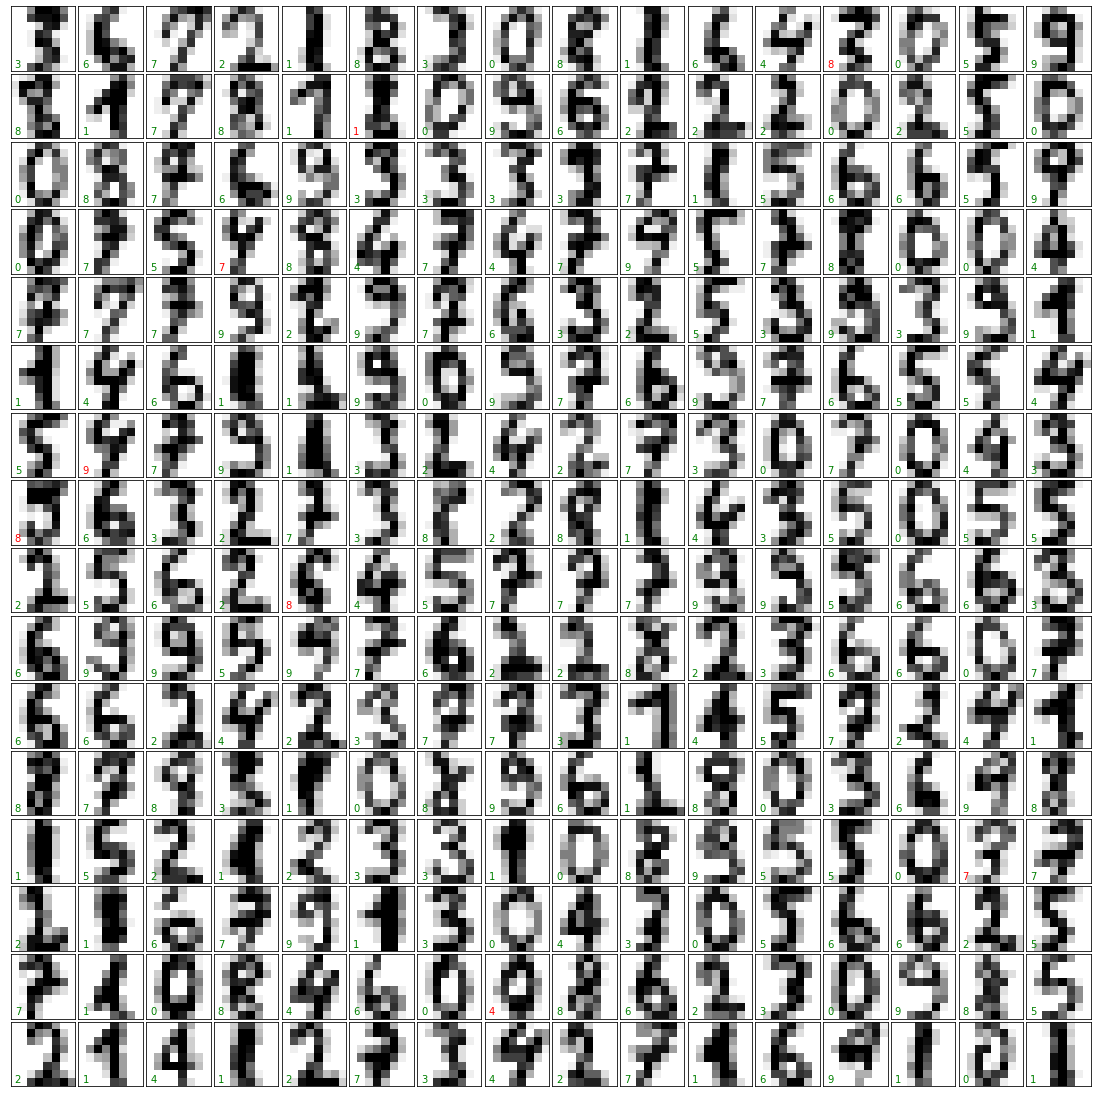

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(256):
    ax = fig.add_subplot(16, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test_rfc.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    if predicted_rfc[i] == expected_rfc[i]:
        ax.text(0, 7, str(predicted_rfc[i]), color='green')
    else:
        ax.text(0, 7, str(predicted_rfc[i]), color='red')

In [8]:
print(metrics.classification_report(expected_rfc, predicted_rfc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.96      1.00      0.98        52
           2       1.00      1.00      1.00        41
           3       1.00      0.96      0.98        51
           4       0.95      0.95      0.95        43
           5       1.00      0.95      0.98        43
           6       1.00      0.98      0.99        42
           7       0.96      0.98      0.97        52
           8       0.90      0.95      0.92        37
           9       0.93      0.98      0.95        43

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [9]:
d_rfc = [array for array in metrics.confusion_matrix(expected_rfc, predicted_rfc)]
data_matrix_rfc = {"0": d_rfc[0], "1": d_rfc[1], "2": d_rfc[2], "3": d_rfc[3], "4": d_rfc[4], \
                   "5": d_rfc[5], "6": d_rfc[6], "7": d_rfc[7], "8": d_rfc[8], "9": d_rfc[9]}
df_matrix_rfc = pd.DataFrame(data=data_matrix_rfc)
df_matrix_rfc

,0,1,2,3,4,5,6,7,8,9
0,44,0,0,0,0,0,0,0,0,0
1,0,52,0,0,0,0,0,0,2,0
2,0,0,41,0,0,0,0,0,0,0
3,0,0,0,49,0,0,0,0,0,0
4,2,0,0,0,41,0,0,0,0,0
5,0,0,0,0,0,41,0,0,0,0
6,0,0,0,0,0,0,41,0,0,0
7,0,0,0,1,1,0,0,51,0,0
8,0,0,0,1,0,1,1,0,35,1
9,0,0,0,0,1,1,0,1,0,42
